In [155]:
import os
import logging
from tqdm import tqdm
from PIL import Image

In [156]:
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s- %(message)s")


In [157]:
def check_is_dir(path):
    if not os.path.isdir(path):
        raise ValueError(f"Provided path : {path} is not a directory")
    return True

In [158]:
def filter_images(list_of_files):
    valid_extensions={'.jpg','.png','.jpeg','.webp'}
    return [file for file in list_of_files if any ( file.endswith(ext) for ext in valid_extensions)]



In [159]:
def load_image(image_path):
    image=Image.open(image_path).convert('RGB')
    return image

In [160]:
def read_images_from_dir(dir_path):
    check_is_dir(dir_path)
    files=os.listdir(dir_path)
    image_files=filter_images(files)
    image_paths=[os.path.join(dir_path, file) for file in image_files]
    images=[load_image(image_path)  for image_path in tqdm (image_paths)]
    logging.info(f"Load {len (images)} images from {dir_path}")
    return images

In [161]:
loaded_images=read_images_from_dir("raw_images/horse")

 41%|████      | 92/225 [00:00<00:01, 131.89it/s]/opt/miniconda3/envs/classifier/lib/python3.10/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 225/225 [00:03<00:00, 61.61it/s] 
2024-06-14 18:09:13,437 - INFO- Load 225 images from raw_images/horse


In [162]:
def max_reloation_rescale(image,max_width,max_height):
    width , height =image.size
    if width > max_width or height > max_height:
        ratio =min(max_width / width , max_height/height)
        new_width=int(width * ratio)
        new_height=int(height * ratio)
        image=image.resize((new_height,new_width), Image.LANCZOS)
    return image

In [163]:
max_size=1024
resized_images=list(map(lambda x : max_reloation_rescale(x,max_size,max_size), tqdm(loaded_images)))

100%|██████████| 225/225 [00:02<00:00, 95.03it/s] 


In [164]:
def min_resolution_filter(image,min_width,min_height):
    width , height = image.size
    return width >= min_width and height >= min_height

In [165]:
min_size=224
filtered_images = list(filter(lambda x: min_resolution_filter(x, min_size, min_size), tqdm(resized_images)))


100%|██████████| 225/225 [00:00<00:00, 1811359.69it/s]


In [166]:
len(filtered_images)

209

In [167]:
import matplotlib.pyplot as plt

In [168]:
def plot_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

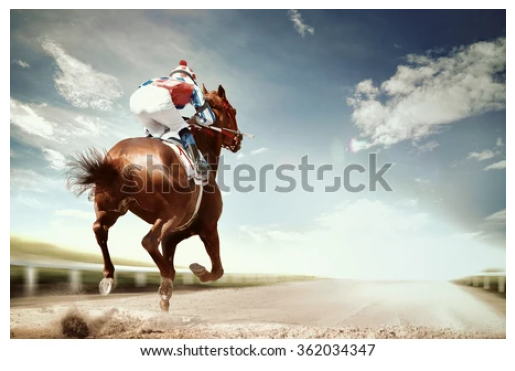

In [169]:
plot_image(filtered_images[14])

In [170]:
def center_crop(image,new_width,new_height):
    width,height=image.size
    left=(width - new_width) / 2
    top=(height - new_height) / 2
    bottom=(height + new_height) / 2
    right=(width + new_width) / 2
    cropped_image=image.crop((left,top,right,bottom))
    logging.info(f"Center cropped image t {new_width} x{new_height}")
    return cropped_image

In [171]:
min_size=224


2024-06-14 18:09:15,958 - INFO- Center cropped image t 224 x224


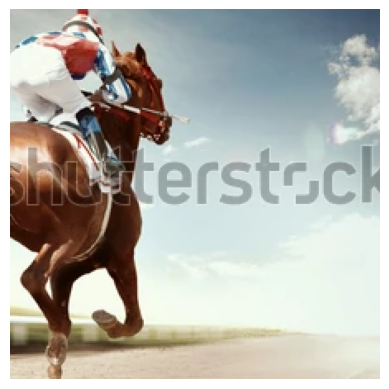

In [172]:
plot_image(center_crop(filtered_images[14],min_size,min_size))

In [173]:
from smartcopy import detect

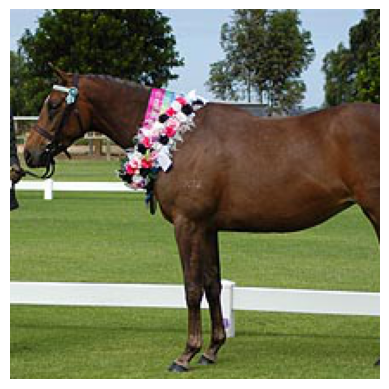

In [174]:
cropped_images=detect(filtered_images[22],square=True)
plot_image(cropped_images)

In [175]:
cropped_images=list(map(lambda x : detect(x ,square=True), tqdm(filtered_images)))

100%|██████████| 209/209 [00:07<00:00, 29.29it/s]


In [176]:
import numpy as np 

In [177]:
def save_image(image,save_path):
    
    if isinstance(image,np.ndarray):
        image=Image.fromarray(image)

    if not isinstance(image,Image.Image):
        raise ValueError('Input image must be a numpy array or PIL image')\
        
    if image.mode != "RGB" :
        image=image.convert('RGB')

    image.save(save_path)
    logging.info(f"Saved image to {save_path}")


In [178]:
def create_directory(dir_path):
    if not os.path.isdir(dir_path):
        os.makedirs(dir_path)
        print(f"Directory created : {dir_path}")
    else:
        print(f'Directory already exist {dir_path}')

In [179]:
def save_images_to_dir(images,dir_path):
    create_directory(dir_path)
    check_is_dir(dir_path)

    for idx ,image in tqdm(enumerate(images, 1)):
        save_path=os.path.join(dir_path,f"image_{idx}.png")
        save_image(image,save_path)

    return True

In [180]:
save_images_to_dir(cropped_images,"processed_images/horse")

Directory created : processed_images/horse


0it [00:00, ?it/s]2024-06-14 18:09:23,468 - INFO- Saved image to processed_images/horse/image_1.png
1it [00:00,  5.68it/s]2024-06-14 18:09:23,555 - INFO- Saved image to processed_images/horse/image_2.png
2024-06-14 18:09:23,612 - INFO- Saved image to processed_images/horse/image_3.png
3it [00:00, 10.13it/s]2024-06-14 18:09:23,667 - INFO- Saved image to processed_images/horse/image_4.png
2024-06-14 18:09:23,684 - INFO- Saved image to processed_images/horse/image_5.png
2024-06-14 18:09:23,705 - INFO- Saved image to processed_images/horse/image_6.png
2024-06-14 18:09:23,773 - INFO- Saved image to processed_images/horse/image_7.png
7it [00:00, 16.95it/s]2024-06-14 18:09:23,820 - INFO- Saved image to processed_images/horse/image_8.png
2024-06-14 18:09:23,847 - INFO- Saved image to processed_images/horse/image_9.png
2024-06-14 18:09:23,862 - INFO- Saved image to processed_images/horse/image_10.png
2024-06-14 18:09:23,882 - INFO- Saved image to processed_images/horse/image_11.png
11it [00:00,

True